In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import seaborn as sns  # For advanced data visualization
import matplotlib.pyplot as plt  # For basic plotting and visualizations

import string  # For string operations and handling
from nltk.corpus import stopwords  # For removing common stopwords in text analysis

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [6]:
df=pd.read_csv("/content/drive/MyDrive/spam sms detection/spam.csv", encoding='ISO-8859-1')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [11]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [12]:
df.duplicated().sum()

403

***Data Cleaning***

Removing columns 'Unnamed: 2', 'Unnamed: 3', and 'Unnamed: 4' due to their minimal non-null entries (50, 12, and 6 respectively),as they contribute little useful data to the analysis.

403 duplicate values are being removed, keeping the first occurrence

In [13]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],inplace=True)

In [14]:
df.drop_duplicates(keep='first',inplace=True)

In [15]:
df.sample(5)

,v1,v2
3886,ham,Cab is available.they pick up and drop at door...
1390,ham,"I wonder how you got online, my love ? Had you..."
5011,ham,U attend ur driving lesson how many times a wk...
1820,ham,I'll probably be by tomorrow (or even later to...
2406,ham,One of best dialogue in cute reltnship..!! \We...


In [16]:
df.duplicated().sum()

0

In [17]:
df=df.rename(columns={'v1':'TARGET','v2':'MESSAGE'})

In [18]:
df.head()

,TARGET,MESSAGE
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['TARGET']=encoder.fit_transform(df['TARGET'])
df.head()

,TARGET,MESSAGE
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


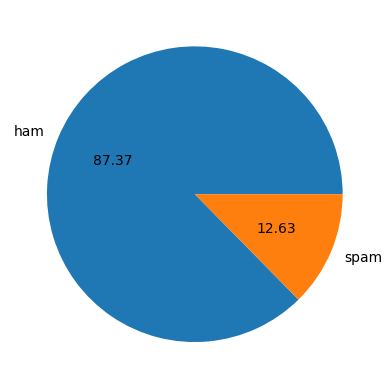

In [20]:
plt.pie(df["TARGET"].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
df['MESSAGE'][5].lower()

"freemsg hey there darling it's been 3 week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send, å£1.50 to rcv"

In [22]:
df["MESSAGE"] = df["MESSAGE"].str.lower()

In [23]:
def remove_stopwords(text):
    new_text=[]
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)

    x = new_text[:]  # Create a copy of new_text
    new_text.clear()  # Clear the original new_text list
    return " ".join(x)  # Join the copied list x into a single string separated by spaces and return it

In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
df["MESSAGE"] = df["MESSAGE"].apply(remove_stopwords)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(df['MESSAGE'])
y = df['TARGET']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [33]:
print(X_train.shape)
print(X_test.shape)

(4135, 8650)
(1034, 8650)


In [34]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

lr=LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

97.678916827853


[[892   2]
 [ 22 118]]


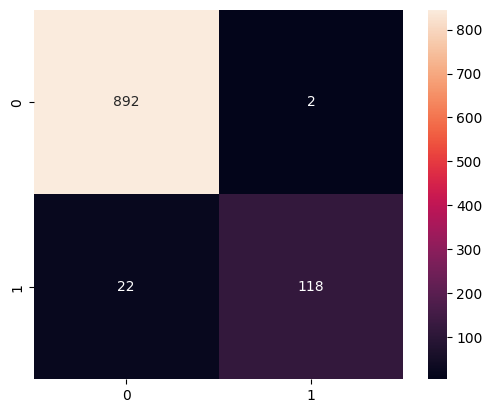

In [35]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

sns.heatmap(conf_mat, square = True, annot = True, robust = True, fmt='g')
plt.show()

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the model
gb = GaussianNB()

# Train the model
gb.fit(X_train.toarray(), y_train)

# Make predictions
y_pred = gb.predict(X_test.toarray())

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 90.33%
Precision: 0.93
Recall: 0.90
F1 Score: 0.91
Confusion Matrix:
[[809  85]
 [ 15 125]]
